In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Question 1

In [2]:
data1 = pd.read_csv('lbnl.anon-ftp.03-01-11.csv',low_memory=False)
data2 = pd.read_csv('lbnl.anon-ftp.03-01-14.csv',low_memory=False)
data3 = pd.read_csv('lbnl.anon-ftp.03-01-18.csv',low_memory=False)

In [224]:
print(data1.head(5))
print(data2.head(5))
print(data3.head(5))

   No.      Time        Source   Destination Protocol  Length  \
0    1  0.000000  142.164.6.70  131.243.1.10      TCP      62   
1    2  0.000718  131.243.1.10  142.164.6.70      TCP      58   
2    3  2.962409  142.164.6.70  131.243.1.10      TCP      62   
3    4  3.000339  131.243.1.10  142.164.6.70      TCP      58   
4    5  4.695735  142.164.6.70  131.243.1.10      TCP      54   

                                                Info src_port dest_port  \
0  1313  >  21 [SYN] Seq=1734984547 Win=8760 Len=...     1313        21   
1  21  >  1313 [SYN, ACK] Seq=1166102836 Ack=1734...       21      1313   
2   1313  >  21 [SYN] Seq=1734984547 Win=8760 Len...     1313        21   
3   21  >  1313 [SYN, ACK] Seq=1166102836 Ack=173...       21      1313   
4  1313  >  21 [ACK] Seq=1734984548 Ack=116610283...     1313        21   

          Seq         Ack  
0  1734984547          -1  
1  1166102836  1734984548  
2  1734984547          -1  
3  1166102836  1734984548  
4  1734984548  116

In [225]:
data1_synb = []
data2_synb = []
data3_synb = []

In [226]:
for i in range(data1.shape[0]):
    if data1.iloc[i][6].find("[SYN]")>0:
        data1_synb.append(True)
    else:
        data1_synb.append(False)
        
for i in range(data2.shape[0]):
    if data2.iloc[i][6].find("[SYN]")>0:
        data2_synb.append(True)
    else:
        data2_synb.append(False)

for i in range(data3.shape[0]):
    if data3.iloc[i][6].find("[SYN]")>0:
        data3_synb.append(True)
    else:
        data3_synb.append(False)

In [227]:
data1_syn = data1[data1_synb]
data2_syn = data2[data2_synb]
data3_syn = data3[data3_synb]

In [188]:
print("Data 1")
print("No of unique source",data1_syn['Source'].unique().size)
print("No of unique destination",data1_syn['Destination'].unique().size)
print("Data 1")
print("No of unique source",data2_syn['Source'].unique().size)
print("No of unique destination",data2_syn['Destination'].unique().size)
print("Data 1")
print("No of unique source",data3_syn['Source'].unique().size)
print("No of unique destination",data3_syn['Destination'].unique().size)

Data 1
No of unique source 522
No of unique destination 45
Data 1
No of unique source 939
No of unique destination 50
Data 1
No of unique source 510
No of unique destination 89


In [189]:
data1['Protocol'].unique()

array(['TCP', 'FTP'], dtype=object)

# Question 2

In [5]:
import re

In [6]:
def srcdst_split_src(x):
    if re.findall(r"[\d]+[\s]+\>[\s]+[\d]+",x):
        return re.findall(r"[\d]+[\s]+\>[\s]+[\d]+",x)[0].split("  >  ")[0]
    else:
        return None
def srcdst_split_dest(x):
    if re.findall(r"[\d]+[\s]+\>[\s]+[\d]+",x):
        return re.findall(r"[\d]+[\s]+\>[\s]+[\d]+",x)[0].split("  >  ")[1]
    else:
        return None

In [7]:
data1["src_port"] = data1['Info'].apply(srcdst_split_src)
data1["dest_port"] = data1['Info'].apply(srcdst_split_dest)
data2["src_port"] = data2['Info'].apply(srcdst_split_src)
data2["dest_port"] = data2['Info'].apply(srcdst_split_dest)
data3["src_port"] = data3['Info'].apply(srcdst_split_src)
data3["dest_port"] = data3['Info'].apply(srcdst_split_dest)

In [191]:
data1_tcpf = pd.DataFrame(data1.groupby(['Source','Destination','src_port','dest_port']).size().reset_index(name='Freq'))
data2_tcpf = pd.DataFrame(data2.groupby(['Source','Destination','src_port','dest_port']).size().reset_index(name='Freq'))
data3_tcpf = pd.DataFrame(data3.groupby(['Source','Destination','src_port','dest_port']).size().reset_index(name='Freq'))

In [192]:
(data1_tcpf['src_port']==None).unique()

array([False])

In [193]:
print("Data 1")
print("Size of tcp flow", data1_tcpf.shape)
print("Data 2")
print("Size of tcp flow", data2_tcpf.shape)
print("Data 3")
print("Size of tcp flow", data3_tcpf.shape)

Data 1
Size of tcp flow (3256, 5)
Data 2
Size of tcp flow (5422, 5)
Data 3
Size of tcp flow (3280, 5)


# Question 3

Text(0.5, 1.0, 'FTP connections')

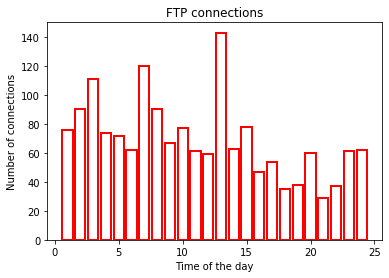

In [246]:
time_of_day = range(1,25)
data1_numflow = []
for i in range(1,25):
    n = ((data1_syn['Time']<i*60*60) & (data1_syn['Time']> (i-1)*60*60)).astype(int).sum()
    data1_numflow.append(n)
    
plt.bar(time_of_day,data1_numflow,linewidth=2,edgecolor='r',color='w')
plt.xlabel("Time of the day")
plt.ylabel("Number of connections")
plt.title("FTP connections")

Text(0.5, 1.0, 'FTP connections')

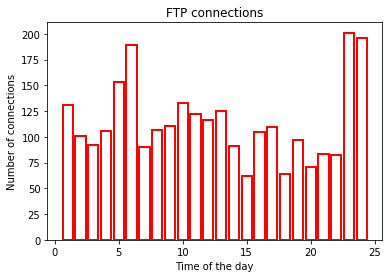

In [244]:
data2_numflow = []
for i in range(1,25):
    n = ((data2_syn['Time']<i*60*60) & (data2_syn['Time']> (i-1)*60*60)).astype(int).sum()
    data2_numflow.append(n)
    
plt.bar(time_of_day,data2_numflow,linewidth=2,edgecolor='r',color='w')
plt.xlabel("Time of the day")
plt.ylabel("Number of connections")
plt.title("FTP connections")

Text(0.5, 1.0, 'FTP connections')

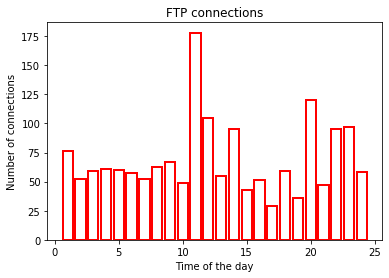

In [243]:
data3_numflow = []
for i in range(1,25):
    n = ((data3_syn['Time']<i*60*60) & (data3_syn['Time']> (i-1)*60*60)).astype(int).sum()
    data3_numflow.append(n)
    
plt.bar(time_of_day,data3_numflow,linewidth=2,edgecolor='r',color='w')
plt.xlabel("Time of the day")
plt.ylabel("Number of connections")
plt.title("FTP connections")

# Question 4

In [281]:
data1_finb = []
data2_finb = []
data3_finb = []
for i in range(data1.shape[0]):
    if data1.iloc[i][6].find("[RST]")>0:
        data1_finb.append(True)
    elif data1.iloc[i][6].find("[FIN, ACK]")>0:
        data1_finb.append(True)
    else:
        data1_finb.append(False)

for i in range(data2.shape[0]):
    if data2.iloc[i][6].find("[RST]")>0:
        data2_finb.append(True)
    elif data2.iloc[i][6].find("[FIN, ACK]")>0:
        data2_finb.append(True)
    else:
        data2_finb.append(False)

for i in range(data3.shape[0]):
    if data3.iloc[i][6].find("[RST]")>0:
        data3_finb.append(True)
    elif data3.iloc[i][6].find("[FIN, ACK]")>0:
        data3_finb.append(True)
    else:
        data3_finb.append(False)
data1_fin = data1[data1_finb]
data2_fin = data2[data2_finb]
data3_fin = data3[data3_finb]

In [282]:
data1_synb = []
data2_synb = []
data3_synb = []
for i in range(data1.shape[0]):
    if data1.iloc[i][6].find("[SYN]")>0:
        data1_synb.append(True)
    else:
        data1_synb.append(False)
        
for i in range(data2.shape[0]):
    if data2.iloc[i][6].find("[SYN]")>0:
        data2_synb.append(True)
    else:
        data2_synb.append(False)

for i in range(data3.shape[0]):
    if data3.iloc[i][6].find("[SYN]")>0:
        data3_synb.append(True)
    else:
        data3_synb.append(False)
data1_syn = data1[data1_synb]
data2_syn = data2[data2_synb]
data3_syn = data3[data3_synb]

In [283]:
data1_sf = pd.concat([data1_syn,data1_fin]).sort_values('Time')
data2_sf = pd.concat([data2_syn,data2_fin]).sort_values('Time')
data3_sf = pd.concat([data3_syn,data3_fin]).sort_values('Time')

In [330]:
connect_dur1 = []
connect_dur2 = []
connect_dur3 = []

Text(0.5, 1.0, 'CDF of connection duration')

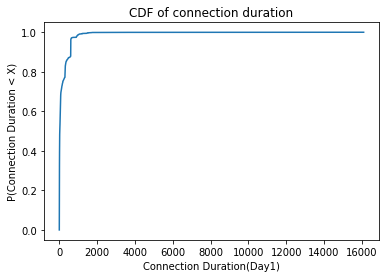

In [331]:
for i in range(data1_sf.shape[0]):
    if data1_sf.iloc[i][6].find("[SYN]")>0:
        for j in range(i,data1_sf.shape[0]):
            if (data1_sf.iloc[i][2]==data1_sf.iloc[j][2] and data1_sf.iloc[i][3]==data1_sf.iloc[j][3] and data1_sf.iloc[i][7]==data1_sf.iloc[j][7] and data1_sf.iloc[i][8]==data1_sf.iloc[j][8]):
                if (data1_sf.iloc[j][6].find("[RST]")>0 or data1_sf.iloc[j][6].find("[FIN, ACK]")>0):
                    connect_dur1.append(data1_sf.iloc[j][1]-data1_sf.iloc[i][1])
                    break;
            elif (data1_sf.iloc[i][2]==data1_sf.iloc[j][3] and data1_sf.iloc[i][3]==data1_sf.iloc[j][2] and data1_sf.iloc[i][7]==data1_sf.iloc[j][8] and data1_sf.iloc[i][8]==data1_sf.iloc[j][7]):
                if (data1_sf.iloc[j][6].find("[RST]")>0 or data1_sf.iloc[j][6].find("[FIN, ACK]")>0):
                    connect_dur1.append(data1_sf.iloc[j][1]-data1_sf.iloc[i][1])
                    break;
                    
connect_dur1 = np.sort(np.array(connect_dur1))
p1 = 1. * np.arange(len(connect_dur1)) / (len(connect_dur1) - 1)
plt.plot(connect_dur1,p1)
plt.xlabel("Connection Duration(Day1)")
plt.ylabel("P(Connection Duration < X)")
plt.title("CDF of connection duration")

Text(0.5, 1.0, 'CDF of connection duration')

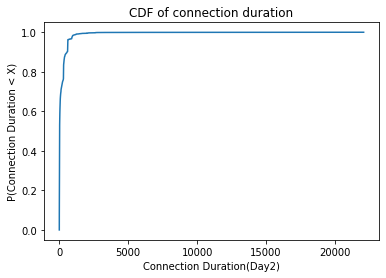

In [332]:
for i in range(data2_sf.shape[0]):
    if data2_sf.iloc[i][6].find("[SYN]")>0:
        for j in range(i,data2_sf.shape[0]):
            if (data2_sf.iloc[i][2]==data2_sf.iloc[j][2] and data2_sf.iloc[i][3]==data2_sf.iloc[j][3] and data2_sf.iloc[i][7]==data2_sf.iloc[j][7] and data2_sf.iloc[i][8]==data2_sf.iloc[j][8]):
                if (data2_sf.iloc[j][6].find("[RST]")>0 or data2_sf.iloc[j][6].find("[FIN, ACK]")>0):
                    connect_dur2.append(data2_sf.iloc[j][1]-data2_sf.iloc[i][1])
                    break;
            elif (data2_sf.iloc[i][2]==data2_sf.iloc[j][3] and data2_sf.iloc[i][3]==data2_sf.iloc[j][2] and data2_sf.iloc[i][7]==data2_sf.iloc[j][8] and data2_sf.iloc[i][8]==data2_sf.iloc[j][7]):
                if (data2_sf.iloc[j][6].find("[RST]")>0 or data2_sf.iloc[j][6].find("[FIN, ACK]")>0):
                    connect_dur2.append(data2_sf.iloc[j][1]-data2_sf.iloc[i][1])
                    break;
                    
connect_dur2 = np.sort(np.array(connect_dur2))
p2 = 1. * np.arange(len(connect_dur2)) / (len(connect_dur2) - 1)
plt.plot(connect_dur2,p2)
plt.xlabel("Connection Duration(Day2)")
plt.ylabel("P(Connection Duration < X)")
plt.title("CDF of connection duration")

Text(0.5, 1.0, 'CDF of connection duration')

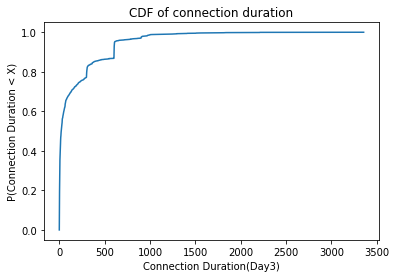

In [333]:
for i in range(data3_sf.shape[0]):
    if data3_sf.iloc[i][6].find("[SYN]")>0:
        for j in range(i,data3_sf.shape[0]):
            if (data3_sf.iloc[i][2]==data3_sf.iloc[j][2] and data3_sf.iloc[i][3]==data3_sf.iloc[j][3] and data3_sf.iloc[i][7]==data3_sf.iloc[j][7] and data3_sf.iloc[i][8]==data3_sf.iloc[j][8]):
                if (data3_sf.iloc[j][6].find("[RST]")>0 or data3_sf.iloc[j][6].find("[FIN, ACK]")>0):
                    connect_dur3.append(data3_sf.iloc[j][1]-data3_sf.iloc[i][1])
                    break;
            elif (data3_sf.iloc[i][2]==data3_sf.iloc[j][3] and data3_sf.iloc[i][3]==data3_sf.iloc[j][2] and data3_sf.iloc[i][7]==data3_sf.iloc[j][8] and data3_sf.iloc[i][8]==data3_sf.iloc[j][7]):
                if (data3_sf.iloc[j][6].find("[RST]")>0 or data3_sf.iloc[j][6].find("[FIN, ACK]")>0):
                    connect_dur3.append(data3_sf.iloc[j][1]-data3_sf.iloc[i][1])
                    break;
                    
connect_dur3 = np.sort(np.array(connect_dur3))
p3 = 1. * np.arange(len(connect_dur3)) / (len(connect_dur3) - 1)
plt.plot(connect_dur3,p3)
plt.xlabel("Connection Duration(Day3)")
plt.ylabel("P(Connection Duration < X)")
plt.title("CDF of connection duration")

# Question 5

In [9]:
connect_dur1 = []
data_send1 = []
data_recv1 = []
dummy_dict_send1 = {}
dummy_dict_recv1 = {}
dummy_dict_time1 = {}
for i in range(data1.shape[0]):
    s = data1.iloc[i][2]
    d = data1.iloc[i][3]
    sp = data1.iloc[i][7]
    dp = data1.iloc[i][8]
    if data1.iloc[i][6].find("[SYN]")>0:
        dummy_dict_send1[(s,d,sp,dp)]=0
        dummy_dict_recv1[(s,d,sp,dp)]=0
        dummy_dict_time1[(s,d,sp,dp)]= data1.iloc[i][1]
    elif (data1.iloc[i][6].find("[RST]")>0 or data1.iloc[i][6].find("[FIN, ACK]")>0):
        if (s,d,sp,dp) in list(dummy_dict_time1.keys()):
            data_send1.append(dummy_dict_send1[(s,d,sp,dp)])
            data_recv1.append(dummy_dict_recv1[(s,d,sp,dp)])
            connect_dur1.append(data1.iloc[i][1]-dummy_dict_time1[(s,d,sp,dp)])
            dummy_dict_send1[(s,d,sp,dp)]=0
            dummy_dict_recv1[(s,d,sp,dp)]=0            
        elif (d,s,dp,sp) in list(dummy_dict_time1.keys()):
            data_send1.append(dummy_dict_send1[(d,s,dp,sp)])
            data_recv1.append(dummy_dict_recv1[(d,s,dp,sp)])
            connect_dur1.append(data1.iloc[i][1]-dummy_dict_time1[(d,s,dp,sp)])
            dummy_dict_send1[(d,s,dp,sp)]=0
            dummy_dict_recv1[(d,s,dp,sp)]=0
        
    else:
        if (s,d,sp,dp) in list(dummy_dict_time1.keys()):
            dummy_dict_send1[(s,d,sp,dp)] += data1.iloc[i][5]  
            
        elif (d,s,dp,sp) in list(dummy_dict_time1.keys()):
            dummy_dict_recv1[(d,s,dp,sp)] += data1.iloc[i][5]                     


Pearson correlation coefficient:  0.3574422570435445


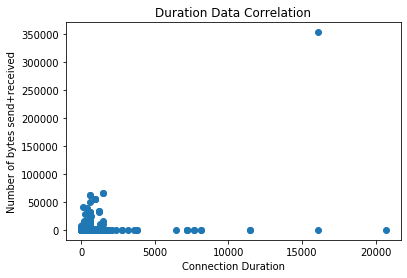

In [12]:
data_send1 = np.array(data_send1)
data_recv1 = np.array(data_recv1)
plt.scatter(connect_dur1,data_send1+data_recv1)
plt.xlabel("Connection Duration")
plt.ylabel("Number of bytes send+received")
plt.title("Duration Data Correlation")
from scipy.stats import pearsonr
print("Pearson correlation coefficient: ",pearsonr(connect_dur1,data_send1+data_recv1)[0])

Pearson correlation coefficient:  0.5464253313739128


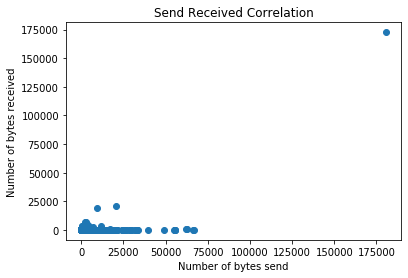

In [13]:
plt.scatter(data_send1,data_recv1)
plt.xlabel("Number of bytes send")
plt.ylabel("Number of bytes received")
plt.title("Send Received Correlation")
from scipy.stats import pearsonr
print("Pearson correlation coefficient: ",pearsonr(data_send1,data_recv1)[0])

In [15]:
connect_dur2 = []
data_send2 = []
data_recv2 = []
dummy_dict_send2 = {}
dummy_dict_recv2 = {}
dummy_dict_time2 = {}
for i in range(data2.shape[0]):
    s = data2.iloc[i][2]
    d = data2.iloc[i][3]
    sp = data2.iloc[i][7]
    dp = data2.iloc[i][8]
    if data2.iloc[i][6].find("[SYN]")>0:
        dummy_dict_send2[(s,d,sp,dp)]=0
        dummy_dict_recv2[(s,d,sp,dp)]=0
        dummy_dict_time2[(s,d,sp,dp)]= data2.iloc[i][1]
    elif (data2.iloc[i][6].find("[RST]")>0 or data2.iloc[i][6].find("[FIN, ACK]")>0):
        if (s,d,sp,dp) in list(dummy_dict_time2.keys()):
            data_send2.append(dummy_dict_send2[(s,d,sp,dp)])
            data_recv2.append(dummy_dict_recv2[(s,d,sp,dp)])
            connect_dur2.append(data2.iloc[i][1]-dummy_dict_time2[(s,d,sp,dp)])
            dummy_dict_send2[(s,d,sp,dp)]=0
            dummy_dict_recv2[(s,d,sp,dp)]=0            
        elif (d,s,dp,sp) in list(dummy_dict_time2.keys()):
            data_send2.append(dummy_dict_send2[(d,s,dp,sp)])
            data_recv2.append(dummy_dict_recv2[(d,s,dp,sp)])
            connect_dur2.append(data2.iloc[i][1]-dummy_dict_time2[(d,s,dp,sp)])
            dummy_dict_send2[(d,s,dp,sp)]=0
            dummy_dict_recv2[(d,s,dp,sp)]=0
        
    else:
        if (s,d,sp,dp) in list(dummy_dict_time2.keys()):
            dummy_dict_send2[(s,d,sp,dp)] += data2.iloc[i][5]  
            
        elif (d,s,dp,sp) in list(dummy_dict_time2.keys()):
            dummy_dict_recv2[(d,s,dp,sp)] += data2.iloc[i][5]                     


Pearson correlation coefficient:  0.03119160095883971


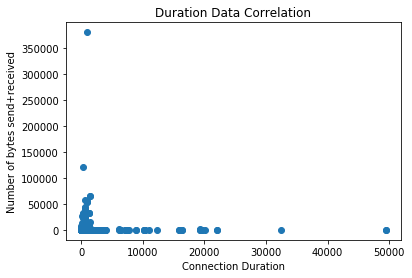

In [16]:
data_send2 = np.array(data_send2)
data_recv2 = np.array(data_recv2)
plt.scatter(connect_dur2,data_send2+data_recv2)
plt.xlabel("Connection Duration")
plt.ylabel("Number of bytes send+received")
plt.title("Duration Data Correlation")
from scipy.stats import pearsonr
print("Pearson correlation coefficient: ",pearsonr(connect_dur2,data_send2+data_recv2)[0])

Pearson correlation coefficient:  0.5741569761243868


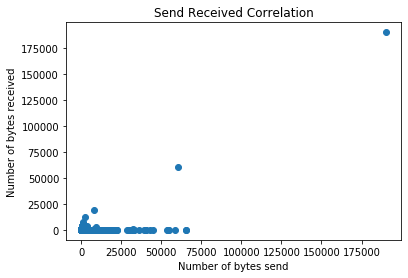

In [17]:
plt.scatter(data_send2,data_recv2)
plt.xlabel("Number of bytes send")
plt.ylabel("Number of bytes received")
plt.title("Send Received Correlation")
from scipy.stats import pearsonr
print("Pearson correlation coefficient: ",pearsonr(data_send2,data_recv2)[0])

In [18]:
connect_dur3 = []
data_send3 = []
data_recv3 = []
dummy_dict_send3 = {}
dummy_dict_recv3 = {}
dummy_dict_time3 = {}
for i in range(data3.shape[0]):
    s = data3.iloc[i][2]
    d = data3.iloc[i][3]
    sp = data3.iloc[i][7]
    dp = data3.iloc[i][8]
    if data3.iloc[i][6].find("[SYN]")>0:
        dummy_dict_send3[(s,d,sp,dp)]=0
        dummy_dict_recv3[(s,d,sp,dp)]=0
        dummy_dict_time3[(s,d,sp,dp)]= data3.iloc[i][1]
    elif (data3.iloc[i][6].find("[RST]")>0 or data3.iloc[i][6].find("[FIN, ACK]")>0):
        if (s,d,sp,dp) in list(dummy_dict_time3.keys()):
            data_send3.append(dummy_dict_send3[(s,d,sp,dp)])
            data_recv3.append(dummy_dict_recv3[(s,d,sp,dp)])
            connect_dur3.append(data3.iloc[i][1]-dummy_dict_time3[(s,d,sp,dp)])
            dummy_dict_send3[(s,d,sp,dp)]=0
            dummy_dict_recv3[(s,d,sp,dp)]=0            
        elif (d,s,dp,sp) in list(dummy_dict_time3.keys()):
            data_send3.append(dummy_dict_send3[(d,s,dp,sp)])
            data_recv3.append(dummy_dict_recv3[(d,s,dp,sp)])
            connect_dur3.append(data3.iloc[i][1]-dummy_dict_time3[(d,s,dp,sp)])
            dummy_dict_send3[(d,s,dp,sp)]=0
            dummy_dict_recv3[(d,s,dp,sp)]=0
        
    else:
        if (s,d,sp,dp) in list(dummy_dict_time3.keys()):
            dummy_dict_send3[(s,d,sp,dp)] += data3.iloc[i][5]  
            
        elif (d,s,dp,sp) in list(dummy_dict_time3.keys()):
            dummy_dict_recv3[(d,s,dp,sp)] += data3.iloc[i][5]                     


Pearson correlation coefficient:  0.13428426363004992


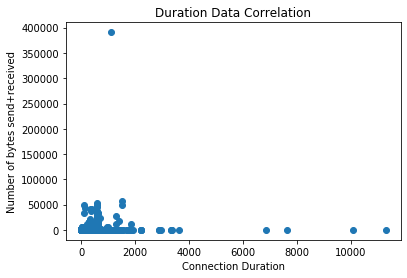

In [20]:
data_send3 = np.array(data_send3)
data_recv3 = np.array(data_recv3)
plt.scatter(connect_dur3,data_send3+data_recv3)
plt.xlabel("Connection Duration")
plt.ylabel("Number of bytes send+received")
plt.title("Duration Data Correlation")
from scipy.stats import pearsonr
print("Pearson correlation coefficient: ",pearsonr(connect_dur3,data_send3+data_recv3)[0])

Pearson correlation coefficient:  0.6277273797423198


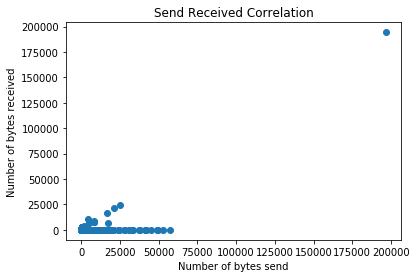

In [19]:
plt.scatter(data_send3,data_recv3)
plt.xlabel("Number of bytes send")
plt.ylabel("Number of bytes received")
plt.title("Send Received Correlation")
from scipy.stats import pearsonr
print("Pearson correlation coefficient: ",pearsonr(data_send3,data_recv3)[0])

# Question 6 

Mean : 51.81125173725255
Median : 22.295093000000634


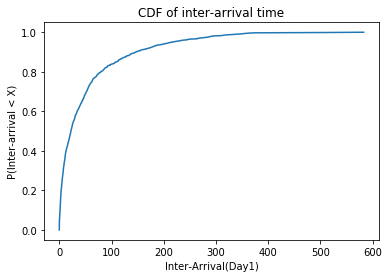

In [228]:
inter_arrival1 = [0]
for i in range(1,len(data1_syn)):
    inter_arrival1.append(data1_syn.iloc[i][1]-data1_syn.iloc[i-1][1])

inter_arrival1 = np.sort(np.array(inter_arrival1))
p1 = 1. * np.arange(len(inter_arrival1)) / (len(inter_arrival1) - 1)
plt.plot(inter_arrival1,p1)
plt.xlabel("Inter-Arrival(Day1)")
plt.ylabel("P(Inter-arrival < X)")
plt.title("CDF of inter-arrival time")
print("Mean :",np.mean(inter_arrival1))
print("Median :",np.median(inter_arrival1))

Mean : 31.497259491413956
Median : 14.375268999996479


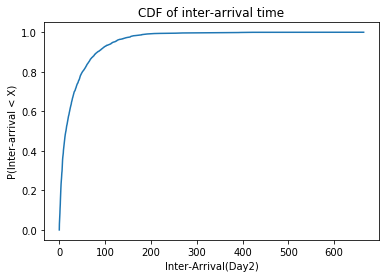

In [229]:
inter_arrival2 = [0]
for i in range(1,len(data2_syn)):
    inter_arrival2.append(data2_syn.iloc[i][1]-data2_syn.iloc[i-1][1])

inter_arrival2 = np.sort(np.array(inter_arrival2))
p2 = 1. * np.arange(len(inter_arrival2)) / (len(inter_arrival2) - 1)
plt.plot(inter_arrival2,p2)
plt.xlabel("Inter-Arrival(Day2)")
plt.ylabel("P(Inter-arrival < X)")
plt.title("CDF of inter-arrival time")
print("Mean :",np.mean(inter_arrival2))
print("Median :",np.median(inter_arrival2))

Mean : 51.34636656216217
Median : 19.58248900000035


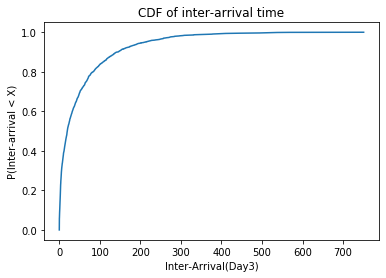

In [230]:
inter_arrival3 = [0]
for i in range(1,len(data3_syn)):
    inter_arrival3.append(data3_syn.iloc[i][1]-data3_syn.iloc[i-1][1])

inter_arrival3 = np.sort(np.array(inter_arrival3))
p3 = 1. * np.arange(len(inter_arrival3)) / (len(inter_arrival3) - 1)
plt.plot(inter_arrival3,p3)
plt.xlabel("Inter-Arrival(Day3)")
plt.ylabel("P(Inter-arrival < X)")
plt.title("CDF of inter-arrival time")
print("Mean :",np.mean(inter_arrival3))
print("Median :",np.median(inter_arrival3))

In [232]:
np.savetxt("inter_arrival1.csv",inter_arrival1)
np.savetxt("inter_arrival2.csv",inter_arrival2)
np.savetxt("inter_arrival3.csv",inter_arrival3)

# Question 7

In [233]:
data1_server = data1_syn['Destination'].unique()
data2_server = data2_syn['Destination'].unique()
data3_server = data3_syn['Destination'].unique()
arrival_server1 = []
arrival_server2 = []
arrival_server3 = []
for i in range(data1.shape[0]):
    if data1.iloc[i][3] in data1_server and data1.iloc[i][4]=='TCP':
        arrival_server1.append(data1.iloc[i][1])
        
for i in range(data2.shape[0]):
    if data2.iloc[i][3] in data2_server and data2.iloc[i][4]=='TCP':
        arrival_server2.append(data2.iloc[i][1])
        
for i in range(data3.shape[0]):
    if data3.iloc[i][3] in data3_server and data3.iloc[i][4]=='TCP':
        arrival_server3.append(data3.iloc[i][1])        

Mean : 1.1328515189167925
Median : 0.5501960000001418


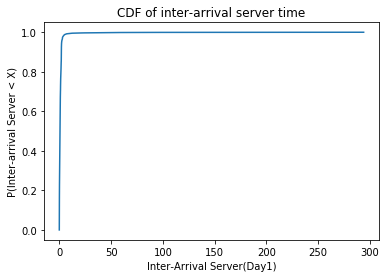

In [234]:
inter_arrival_server1 = [0]
for i in range(1,len(arrival_server1)):
    inter_arrival_server1.append(arrival_server1[i]-arrival_server1[i-1])

inter_arrival_server1 = np.sort(np.array(inter_arrival_server1))
p1 = 1. * np.arange(len(inter_arrival_server1)) / (len(inter_arrival_server1) - 1)
plt.plot(inter_arrival_server1,p1)
plt.xlabel("Inter-Arrival Server(Day1)")
plt.ylabel("P(Inter-arrival Server < X)")
plt.title("CDF of inter-arrival server time")
print("Mean :",np.mean(inter_arrival_server1))
print("Median :",np.median(inter_arrival_server1))

Mean : 0.9471872654430825
Median : 0.4576184999968973


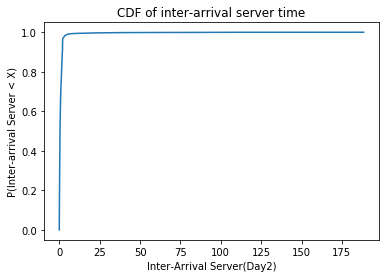

In [235]:
inter_arrival_server2 = [0]
for i in range(1,len(arrival_server2)):
    inter_arrival_server2.append(arrival_server2[i]-arrival_server2[i-1])

inter_arrival_server2 = np.sort(np.array(inter_arrival_server2))
p2 = 1. * np.arange(len(inter_arrival_server2)) / (len(inter_arrival_server2) - 1)
plt.plot(inter_arrival_server2,p2)
plt.xlabel("Inter-Arrival Server(Day2)")
plt.ylabel("P(Inter-arrival Server < X)")
plt.title("CDF of inter-arrival server time")
print("Mean :",np.mean(inter_arrival_server2))
print("Median :",np.median(inter_arrival_server2))

Mean : 1.1746323701393935
Median : 0.5535570000065491


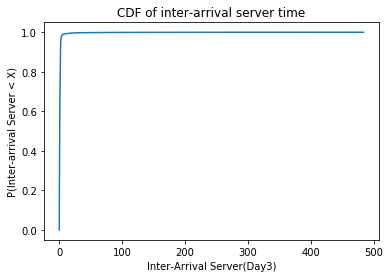

In [236]:
inter_arrival_server3 = [0]
for i in range(1,len(arrival_server3)):
    inter_arrival_server3.append(arrival_server3[i]-arrival_server3[i-1])

inter_arrival_server3 = np.sort(np.array(inter_arrival_server3))
p3 = 1. * np.arange(len(inter_arrival_server3)) / (len(inter_arrival_server3) - 1)
plt.plot(inter_arrival_server3,p3)
plt.xlabel("Inter-Arrival Server(Day3)")
plt.ylabel("P(Inter-arrival Server < X)")
plt.title("CDF of inter-arrival server time")
print("Mean :",np.mean(inter_arrival_server3))
print("Median :",np.median(inter_arrival_server3))

In [237]:
np.savetxt("inter_arrival_server1.csv",inter_arrival_server1)
np.savetxt("inter_arrival_server2.csv",inter_arrival_server2)
np.savetxt("inter_arrival_server3.csv",inter_arrival_server3)

# Question 8

In [371]:
incoming1_size = []
outgoing1_size = []
incoming2_size = []
outgoing2_size = []
incoming3_size = []
outgoing3_size = []

for i in range(data1.shape[0]):
    if data1.iloc[i][3] in data1_server and data1.iloc[i][4]=='TCP':
        outgoing1_size.append(data1.iloc[i][5])
    elif data1.iloc[i][2] in data1_server and data1.iloc[i][4]=='TCP':
        incoming1_size.append(data1.iloc[i][5])
        
for i in range(data2.shape[0]):
    if data2.iloc[i][3] in data2_server and data2.iloc[i][4]=='TCP':
        outgoing2_size.append(data2.iloc[i][5])
    elif data2.iloc[i][2] in data2_server and data2.iloc[i][4]=='TCP':
        incoming2_size.append(data2.iloc[i][5])
        
for i in range(data3.shape[0]):
    if data3.iloc[i][3] in data3_server and data3.iloc[i][4]=='TCP':
        outgoing3_size.append(data3.iloc[i][5])
    elif data3.iloc[i][2] in data3_server and data3.iloc[i][4]=='TCP':
        incoming3_size.append(data3.iloc[i][5])    

Mean : 57.25296030431315
Median : 54.0


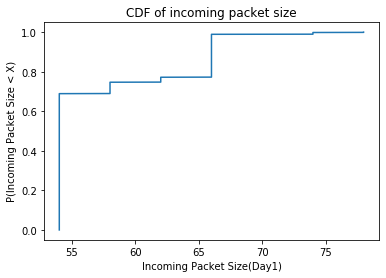

In [372]:
incoming1_size = np.sort(np.array(incoming1_size))
p1 = 1. * np.arange(len(incoming1_size)) / (len(incoming1_size) - 1)
plt.plot(incoming1_size,p1)
plt.xlabel("Incoming Packet Size(Day1)")
plt.ylabel("P(Incoming Packet Size < X)")
plt.title("CDF of incoming packet size")
print("Mean :",np.mean(incoming1_size))
print("Median :",np.median(incoming1_size))

Mean : 56.009874762310666
Median : 54.0


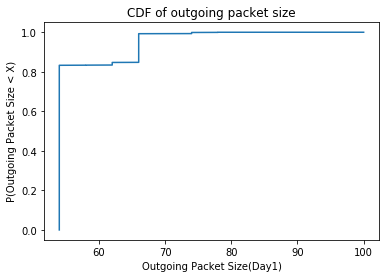

In [373]:
outgoing1_size = np.sort(np.array(outgoing1_size))
p1 = 1. * np.arange(len(outgoing1_size)) / (len(outgoing1_size) - 1)
plt.plot(outgoing1_size,p1)
plt.xlabel("Outgoing Packet Size(Day1)")
plt.ylabel("P(Outgoing Packet Size < X)")
plt.title("CDF of outgoing packet size")
print("Mean :",np.mean(outgoing1_size))
print("Median :",np.median(outgoing1_size))

Mean : 56.60912474814739
Median : 54.0


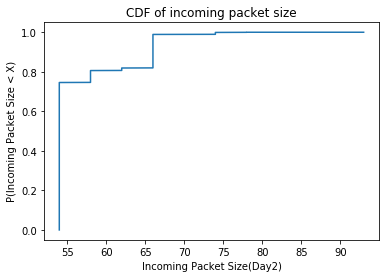

In [374]:
incoming2_size = np.sort(np.array(incoming2_size))
p2 = 1. * np.arange(len(incoming2_size)) / (len(incoming2_size) - 1)
plt.plot(incoming2_size,p2)
plt.xlabel("Incoming Packet Size(Day2)")
plt.ylabel("P(Incoming Packet Size < X)")
plt.title("CDF of incoming packet size")
print("Mean :",np.mean(incoming2_size))
print("Median :",np.median(incoming2_size))

Mean : 56.15523263477
Median : 54.0


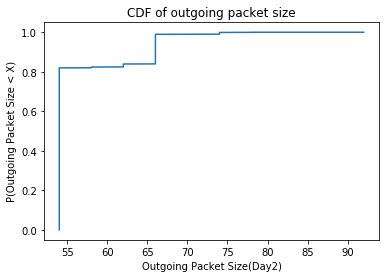

In [375]:
outgoing2_size = np.sort(np.array(outgoing2_size))
p2 = 1. * np.arange(len(outgoing2_size)) / (len(outgoing2_size) - 1)
plt.plot(outgoing2_size,p2)
plt.xlabel("Outgoing Packet Size(Day2)")
plt.ylabel("P(Outgoing Packet Size < X)")
plt.title("CDF of outgoing packet size")
print("Mean :",np.mean(outgoing2_size))
print("Median :",np.median(outgoing2_size))

Mean : 58.086067656858866
Median : 54.0


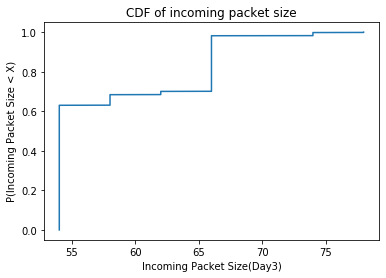

In [376]:
incoming3_size = np.sort(np.array(incoming3_size))
p3 = 1. * np.arange(len(incoming3_size)) / (len(incoming3_size) - 1)
plt.plot(incoming3_size,p3)
plt.xlabel("Incoming Packet Size(Day3)")
plt.ylabel("P(Incoming Packet Size < X)")
plt.title("CDF of incoming packet size")
print("Mean :",np.mean(incoming3_size))
print("Median :",np.median(incoming3_size))

Mean : 55.85410984251429
Median : 54.0


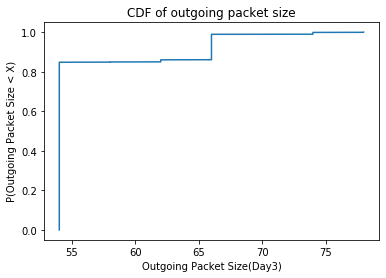

In [377]:
outgoing3_size = np.sort(np.array(outgoing3_size))
p3 = 1. * np.arange(len(outgoing3_size)) / (len(outgoing3_size) - 1)
plt.plot(outgoing3_size,p3)
plt.xlabel("Outgoing Packet Size(Day3)")
plt.ylabel("P(Outgoing Packet Size < X)")
plt.title("CDF of outgoing packet size")
print("Mean :",np.mean(outgoing3_size))
print("Median :",np.median(outgoing3_size))

# Question 9

In [155]:
def seq(x):
    res = re.findall(r"Seq=[\d]+",x)
    if res:
        return int(re.findall(r"[\d]+",res[0])[0])
    else:
        return -1
    
def ack(x):
    res = re.findall(r"Ack=[\d]+",x)
    if res:
        return int(re.findall(r"[\d]+",res[0])[0])
    else:
        return -1

In [156]:
data1["Seq"] = data1['Info'].apply(seq)
data2["Seq"] = data2['Info'].apply(seq)
data3["Seq"] = data3['Info'].apply(seq)
data1["Ack"] = data1['Info'].apply(ack)
data2["Ack"] = data2['Info'].apply(ack)
data3["Ack"] = data3['Info'].apply(ack)

In [157]:
def sequence_tool(source,destination,source_port,destination_port,data):
    sent_conn = ((data["Source"]==source).values * (data["Destination"]==destination).values * (data["src_port"]==source_port).values * (data["dest_port"]==destination_port).values )
    recv_conn = ((data["Source"]==destination).values * (data["Destination"]==source).values * (data["src_port"]==destination_port).values * (data["dest_port"]==source_port).values )
    return data[sent_conn + recv_conn]

Text(0.5, 1.0, 'Sequence Tool')

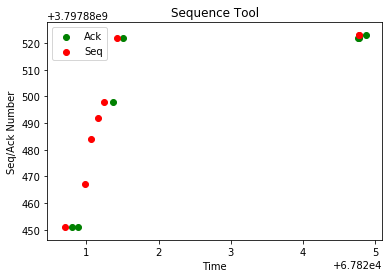

In [163]:
conn1 = sequence_tool('102.107.241.229','131.243.1.10','1402','21',data1)
start_seq = conn1.iloc[0][9]
plt.scatter((conn1[conn1["Seq"] > start_seq])["Time"],(conn1[conn1["Seq"] > start_seq])["Seq"],color='g')
plt.scatter((conn1[conn1["Ack"] > start_seq])["Time"],(conn1[conn1["Ack"] > start_seq])["Ack"],color='r')
plt.legend(["Ack","Seq"])
plt.xlabel("Time")
plt.ylabel("Seq/Ack Number")
plt.title("Sequence Tool")

Text(0.5, 1.0, 'Sequence Tool')

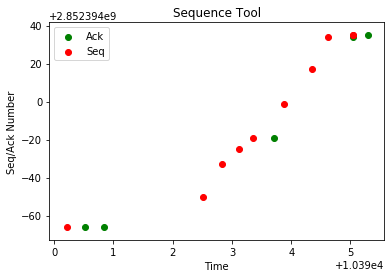

In [162]:
conn2 = sequence_tool('0.154.22.194','131.243.1.10','3322','21',data3)
start_seq = conn2.iloc[0][9]
plt.scatter((conn2[conn2["Seq"] > start_seq])["Time"],(conn2[conn2["Seq"] > start_seq])["Seq"],color='g')
plt.scatter((conn2[conn2["Ack"] > start_seq])["Time"],(conn2[conn2["Ack"] > start_seq])["Ack"],color='r')
plt.legend(["Ack","Seq"])
plt.xlabel("Time")
plt.ylabel("Seq/Ack Number")
plt.title("Sequence Tool")

Text(0.5, 1.0, 'Retransmission')

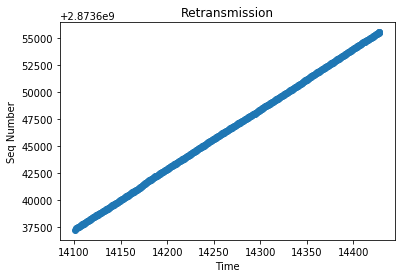

In [193]:
conn3 = sequence_tool('207.190.63.72','128.3.28.48','34973','21',data2)
retrans = []
time = []
trans = []
for i in range(conn3.shape[0]):
    if conn3.iloc[i][8] == '21' and conn3.iloc[i][9] in trans:
        retrans.append(conn3.iloc[i][9])
        time.append(conn3.iloc[i][1])
    else:
        trans.append(conn3.iloc[i][9])
    
plt.scatter(time,retrans)
plt.xlabel("Time")
plt.ylabel("Seq Number")
plt.title("Retransmission")

Text(0.5, 1.0, 'Retransmission')

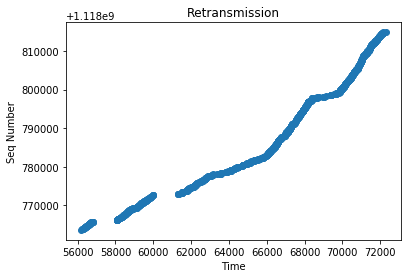

In [191]:
conn4 = sequence_tool('45.20.44.38','128.3.28.48','46160','21',data1)
retrans = []
time = []
trans = []
for i in range(conn4.shape[0]):
    if conn4.iloc[i][8] == '21' and conn4.iloc[i][9] in trans:
        retrans.append(conn4.iloc[i][9])
        time.append(conn4.iloc[i][1])
    else:
        trans.append(conn4.iloc[i][9])
    
plt.scatter(time,retrans)
plt.xlabel("Time")
plt.ylabel("Seq Number")
plt.title("Retransmission")

Text(0.5, 1.0, 'Spurious Transmission')

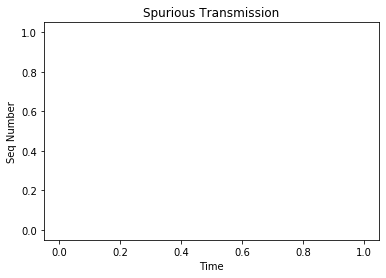

In [201]:
conn5 = sequence_tool('171.1.7.162','128.3.28.48','33682','21',data3)
start_seq = conn5.iloc[0][9]
spurious = []
time = []
ack = [-1]
for i in range(conn5.shape[0]):
    if conn5.iloc[i][9] > start_seq:
        if conn5.iloc[i][9] < max(ack):
            spurious.append(conn5.iloc[i][9])
            time.append(conn5.iloc[i][1])
    elif conn5.iloc[i][10] > start_seq:
        ack.append(conn5.iloc[i][10])
       
    
plt.scatter(time,spurious)
plt.xlabel("Time")
plt.ylabel("Seq Number")
plt.title("Spurious Transmission")

Text(0.5, 1.0, 'Spurious Transmission')

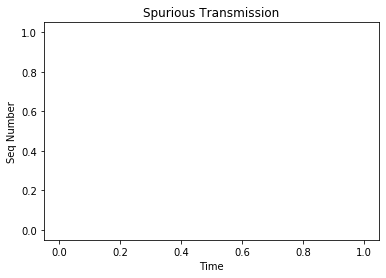

In [202]:
conn6 = sequence_tool('207.190.63.72','128.3.28.48','33527','21',data2)
start_seq = conn6.iloc[0][9]
spurious = []
time = []
ack = [-1]
for i in range(conn6.shape[0]):
    if conn6.iloc[i][9] > start_seq:
        if conn6.iloc[i][9] < max(ack):
            spurious.append(conn6.iloc[i][9])
            time.append(conn6.iloc[i][1])
    elif conn6.iloc[i][10] > start_seq:
        ack.append(conn6.iloc[i][10])
       
    
plt.scatter(time,spurious)
plt.xlabel("Time")
plt.ylabel("Seq Number")
plt.title("Spurious Transmission")

Text(0.5, 1.0, 'Ack Retransmission')

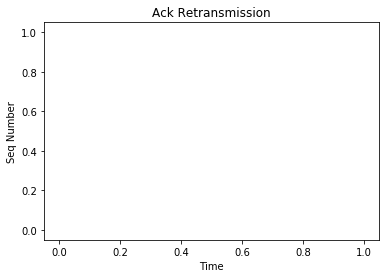

In [212]:
conn7 = sequence_tool('207.190.63.72','128.3.28.48','34973','21',data2)
start_seq = conn7.iloc[0][9]
retrans = []
time = []
trans = []
for i in range(conn7.shape[0]):
    if conn7.iloc[i][7] == '21' and conn7.iloc[i][10] in trans and conn7.iloc[i][10] > start_seq:
        retrans.append(conn7.iloc[i][10])
        time.append(conn7.iloc[i][1])
    else:
        trans.append(conn7.iloc[i][10])
    
plt.scatter(time,retrans)
plt.xlabel("Time")
plt.ylabel("Seq Number")
plt.title("Ack Retransmission")

Text(0.5, 1.0, 'Ack Retransmission')

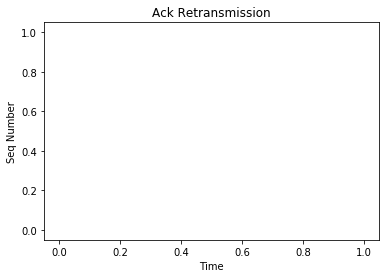

In [217]:
conn8 = sequence_tool('45.20.44.38','128.3.28.48','46160','21',data1)
start_seq = conn8.iloc[0][9]
retrans = []
time = []
trans = []
for i in range(conn8.shape[0]):
    if conn8.iloc[i][7] == '21' and conn8.iloc[i][10] in trans and conn8.iloc[i][10] > start_seq:
        retrans.append(conn8.iloc[i][10])
        time.append(conn8.iloc[i][1])
    else:
        trans.append(conn8.iloc[i][10])
    
plt.scatter(time,retrans)
plt.xlabel("Time")
plt.ylabel("Seq Number")
plt.title("Ack Retransmission")

Text(0.5, 1.0, 'Out of Order Transmission')

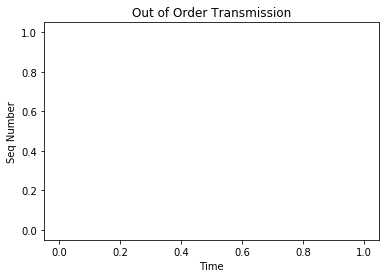

In [222]:
conn9 = sequence_tool('131.201.66.31','203.174.5.11','4613','21',data1)
start_seq = conn9.iloc[0][9]
ofo = []
time = []
trans = [-1]
for i in range(conn9.shape[0]):
    if conn9.iloc[i][8] == '21' and conn9.iloc[i][9] < max(trans) and conn9.iloc[i][9] > start_seq:
        ofo.append(conn9.iloc[i][9])
        time.append(conn9.iloc[i][1])
        trans.append(conn9.iloc[i][9])
    else:
        trans.append(conn9.iloc[i][9])
    
plt.scatter(time,ofo)
plt.xlabel("Time")
plt.ylabel("Seq Number")
plt.title("Out of Order Transmission")

Text(0.5, 1.0, 'Out of Order Transmission')

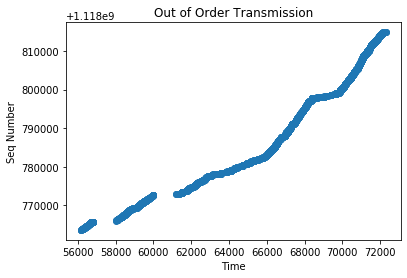

In [216]:
conn10 = sequence_tool('45.20.44.38','128.3.28.48','46160','21',data1)
start_seq = conn10.iloc[0][9]
ofo = []
time = []
trans = [-1]
for i in range(conn10.shape[0]):
    if conn10.iloc[i][8] == '21' and conn10.iloc[i][9] < max(trans) and conn10.iloc[i][9] > start_seq:
        ofo.append(conn10.iloc[i][9])
        time.append(conn10.iloc[i][1])
        trans.append(conn10.iloc[i][9])
    else:
        trans.append(conn10.iloc[i][9])
    
plt.scatter(time,ofo)
plt.xlabel("Time")
plt.ylabel("Seq Number")
plt.title("Out of Order Transmission")

# Question 10

In [ ]:
R code

# Question 11

In [ ]:
Sheets